# WK8 - Exploratory Data Analysis
<hr style="border:2.5px solid #FF0A54">

Name: **Khennan Hiel R. Lopez**
<br>
Course: **CPE2A** 
<br>


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r"raw\chip-dataset-cleaned.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       4854 non-null   object 
 1   Type          4854 non-null   object 
 2   Date          4854 non-null   object 
 3   Process_Size  4854 non-null   float64
 4   TDP           4854 non-null   float64
 5   Die_Size      4854 non-null   float64
 6   Transistors   4854 non-null   float64
 7   Frequency     4854 non-null   int64  
 8   Foundry       4854 non-null   object 
 9   Vendor        4854 non-null   object 
 10  FP16          536 non-null    float64
 11  FP32          1948 non-null   float64
 12  FP64          1306 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB


In [8]:
df = df.drop(df.columns[[10]],axis=1)

## Datset Preview

In [9]:
display(df.head())

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor,FP32,FP64
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD,NaN,NaN
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD,NaN,NaN
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel,NaN,NaN
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel,NaN,NaN
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD,NaN,NaN


## Datset Summary

In [10]:
display(df.describe())

,Process_Size,TDP,Die_Size,Transistors,Frequency,FP32,FP64
count,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000,1948.000000,1306.000000
mean,55.109598,81.359981,188.440445,1929.922279,1484.406057,2134.756653,363.670511
std,44.956931,71.683029,116.523337,3736.859205,1066.701523,3898.431487,1145.931856
min,0.000000,1.000000,1.000000,8.000000,100.000000,12.800000,3.600000
25%,22.000000,35.000000,112.000000,180.000000,590.000000,257.300000,38.295000
50%,40.000000,67.000000,177.000000,950.000000,1073.500000,696.000000,89.280000
75%,90.000000,95.000000,221.000000,1929.922279,2400.000000,2116.750000,220.000000
max,250.000000,900.000000,826.000000,54200.000000,4700.000000,40000.000000,11540.000000


## N Chips Manufactured

In [11]:
df_w = df.copy()
chip_count = df_w['Vendor'].value_counts()
chip_count


Vendor
AMD       1662
Intel     1392
NVIDIA    1201
ATI        535
Other       64
Name: count, dtype: int64

In [12]:
type(chip_count)

pandas.core.series.Series

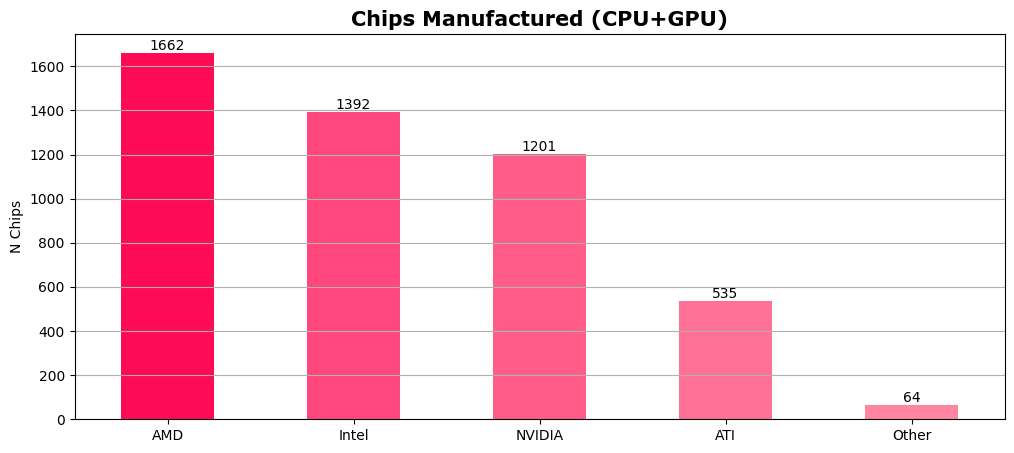

In [13]:
chart = chip_count.plot(kind='bar',
                        color = ['#FF0A54','#FF477E','#FF5C8A','#FF7096','#FF85A1'],
                        figsize=(12,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Chips Manufactured (CPU+GPU)',
          fontfamily = 'Verdana',
          fontsize=15,
          fontweight='bold')
plt.xlabel('')
chart.set_xticklabels(chip_count.index, rotation=0)
plt.ylabel('N Chips')
plt.grid(axis='y', linestyle ='-', alpha=1)
plt.show()

The analysis of chip manufacturing reveals that AMD leads the market with 1,662 units produced, followed by Intel with 1,392 units and NVIDIA with 1,201 units. These three manufacturers dominate the industry, collectively accounting for the majority of production. ATI, with 535 units, plays a much smaller role, while other manufacturers contribute minimally with only 64 units, indicating a highly consolidated market. The dominance of AMD, Intel, and NVIDIA underscores intense competition among the top players, likely driving innovation and setting industry benchmarks. In contrast, ATI and smaller manufacturers may focus on niche markets or specialized products to remain competitive. The minimal contribution from other manufacturers highlights the challenges of entering or surviving in a market dominated by a few key players. This market structure could influence pricing, innovation, and overall industry dynamics.

## N CPU Manufactured

In [14]:
df_cpu = df_w[df_w['Type']=='CPU']
df_cpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor,FP32,FP64
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD,NaN,NaN
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD,NaN,NaN
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel,NaN,NaN
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel,NaN,NaN
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2187,Intel Xeon Gold 6312U,CPU,4/6/2021,10.0,185.0,188.440445,1929.922279,2400,Intel,Intel,NaN,NaN
2188,AMD Ryzen 9 4900H,CPU,3/16/2020,7.0,54.0,156.000000,9800.000000,3300,TSMC,AMD,NaN,NaN
2189,Intel Core 2 Duo E6550,CPU,7/1/2007,65.0,65.0,143.000000,291.000000,2333,Intel,Intel,NaN,NaN
2190,AMD Opteron 246,CPU,12/1/2004,90.0,85.0,188.440445,106.000000,2000,Unknown,AMD,NaN,NaN


In [15]:
cpu_count = df_cpu['Vendor'].value_counts()
cpu_count

Vendor
Intel    1242
AMD       950
Name: count, dtype: int64

In [16]:
type(cpu_count)

pandas.core.series.Series

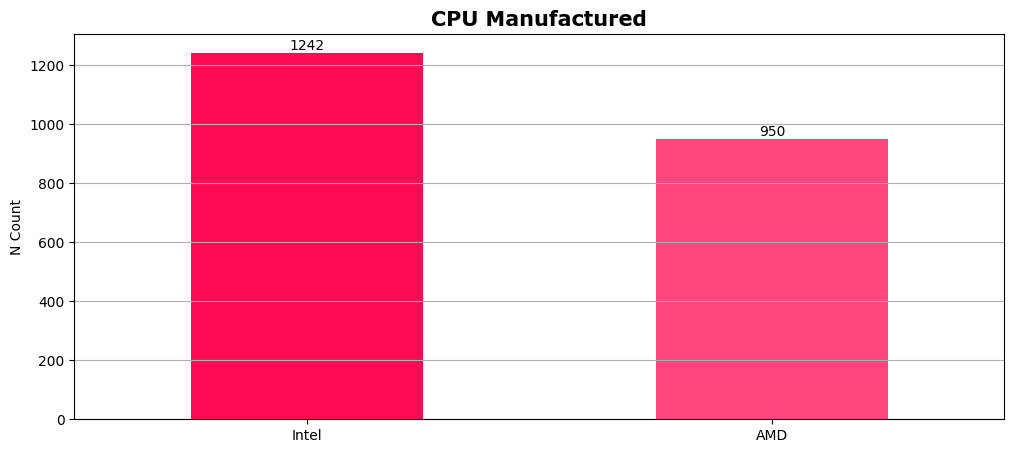

In [17]:
chart = cpu_count.plot(kind='bar',
                       color = ['#FF0A54','#FF477E'],
                       figsize=(12,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('CPU Manufactured',
           fontfamily = 'Verdana',
           fontsize=15,
           fontweight='bold')
plt.ylabel('N Count')
plt.xlabel('')
chart.set_xticklabels(cpu_count.index, rotation=0)
plt.grid(axis='y', linestyle ='-', alpha=1)
plt.show()

The bar chart illustrates the number of CPUs manufactured by Intel and AMD, with Intel producing 1,242 units and AMD producing 950 units. Intel outperforms AMD by a significant margin of 292 units, indicating a higher manufacturing capacity or market demand for Intel processors during the observed period. This disparity might suggest Intel's stronger market presence or operational efficiency, although external factors such as demand trends, production strategies, or market focus could also play a role. The findings imply a competitive yet uneven distribution in the CPU manufacturing industry, favoring Intel.

## N GPU Manufactured

In [18]:
df_gpu = df_w[df_w['Type']=='GPU']
df_gpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor,FP32,FP64
2192,Intel Xeon E3-1275,GPU,4/3/2011,32.0,95.000000,216.000000,1160.000000,100,Intel,Intel,NaN,NaN
2193,Matrox Parhelia 128 MB,GPU,6/25/2002,150.0,81.359981,174.000000,80.000000,200,UMC,Other,NaN,NaN
2194,NVIDIA GeForce MX150 GP107,GPU,2/23/2019,14.0,25.000000,132.000000,3300.000000,1469,Samsung,NVIDIA,1177.0,36.77
2195,Intel GMA 500,GPU,3/2/2008,130.0,81.359981,188.440445,1929.922279,200,Intel,Intel,12.8,NaN
2196,ATI Radeon HD 4350 AGP,GPU,9/30/2008,55.0,20.000000,73.000000,242.000000,600,TSMC,ATI,96.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,2/22/2011,40.0,75.000000,332.000000,1950.000000,450,TSMC,NVIDIA,432.0,36.00
4850,Intel GMA 950,GPU,6/1/2005,90.0,7.000000,188.440445,1929.922279,250,Intel,Intel,NaN,NaN
4851,NVIDIA GeForce GT 320M,GPU,3/3/2010,40.0,23.000000,100.000000,486.000000,500,TSMC,NVIDIA,52.8,NaN
4852,NVIDIA GeForce FX 5200,GPU,3/6/2003,150.0,81.359981,65.000000,29.000000,250,TSMC,NVIDIA,NaN,NaN


In [19]:
gpu_count = df_gpu['Vendor'].value_counts()
gpu_count

Vendor
NVIDIA    1201
AMD        712
ATI        535
Intel      150
Other       64
Name: count, dtype: int64

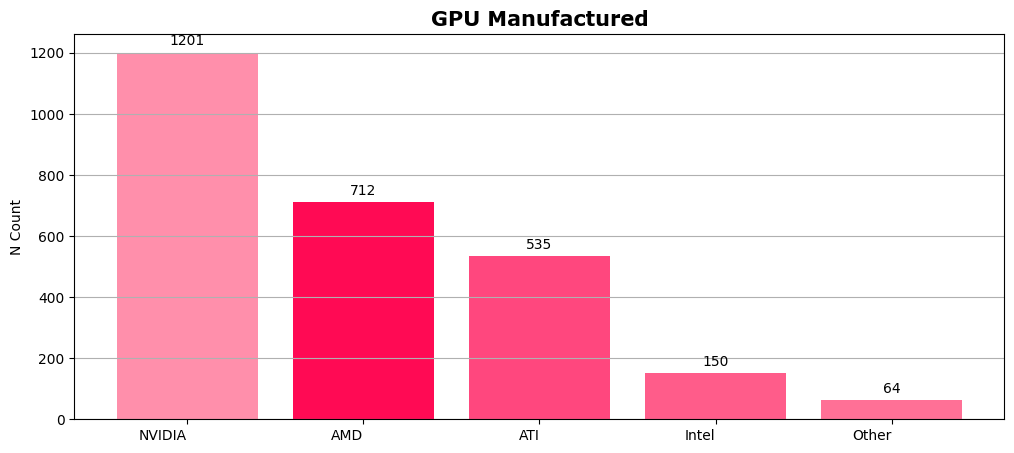

In [20]:
fig, ax = plt.subplots(figsize=(12,5))
bars = ax.bar(gpu_count.index,  
              gpu_count.values,  
              color=['#FF8FAB','#FF0A54','#FF477E','#FF5C8A','#FF7096','#FF85A1'])

plt.bar_label(bars, label_type='edge', padding=3)  

plt.title('GPU Manufactured',
          fontfamily='Verdana',
          fontsize=15,
          fontweight='bold')
plt.ylabel('N Count')
plt.xlabel('')
plt.grid(axis='y', linestyle='-', alpha=1)
plt.xticks(rotation=0, ha='right')
plt.show()

The bar chart illustrates the production counts of GPUs by various manufacturers. NVIDIA leads the market with 1,201 units, showcasing its dominance in the GPU industry, likely due to its strong presence in gaming, AI, and professional graphics sectors. AMD follows with 712 units, reflecting its competitive position, while ATI, with 535 units, indicates legacy data since it was acquired by AMD. Intel, with 150 units, has a relatively minor share, consistent with its recent entry into the discrete GPU market, as it traditionally focused on integrated graphics. The "Other" category, accounting for just 64 units, highlights the limited presence of smaller manufacturers, emphasizing the high barriers to entry in the GPU industry. This data implies an oligopolistic market structure, where NVIDIA and AMD dominate, shaping consumer choices and industry trends.

## CPU and GPU Lowest and Highest TDP (Thermal Design Power)

In [21]:
df_tdp = df_w[['Product','TDP']]
df_tdp

,Product,TDP
0,AMD Athlon 64 3500+,45.000000
1,AMD Athlon 200GE,35.000000
2,Intel Core i5-1145G7,28.000000
3,Intel Xeon E5-2603 v2,80.000000
4,AMD Phenom II X4 980 BE,125.000000
...,...,...
4849,NVIDIA Quadro 3000M,75.000000
4850,Intel GMA 950,7.000000
4851,NVIDIA GeForce GT 320M,23.000000
4852,NVIDIA GeForce FX 5200,81.359981


In [22]:
type(df_tdp)

pandas.core.frame.DataFrame

In [23]:
df_tdphighest = df_tdp.copy()
df_tdplowest = df_tdp.sort_values(by='TDP')
df_tdplowest = df_tdplowest.head(10)

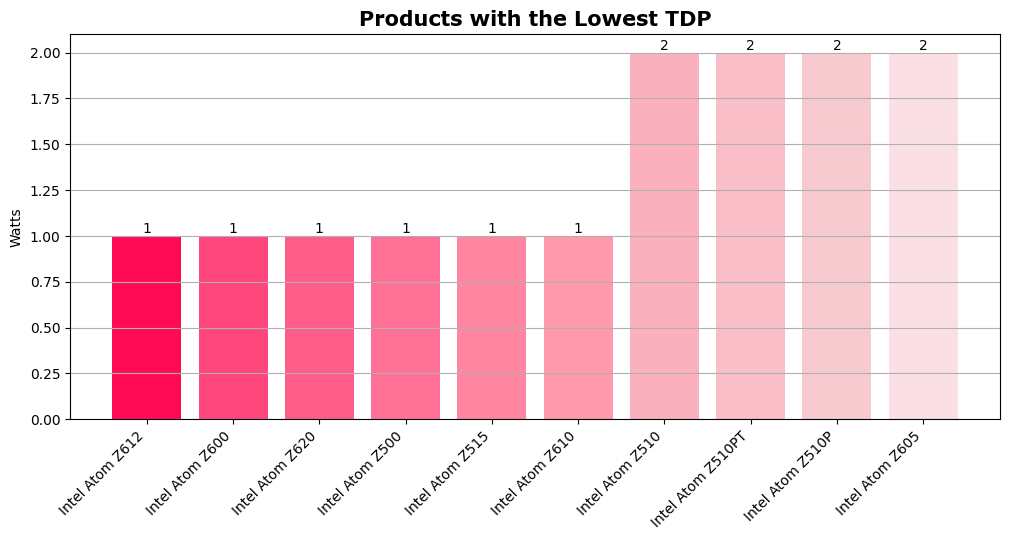

In [24]:
plt.figure(figsize=(12,5))
bars = plt.bar(df_tdplowest['Product'], df_tdplowest['TDP'],
         color = ['#FF0A54','#FF477E','#FF5C8A','#FF7096','#FF85A1',
                 '#FF99AC','#FBB1BD','#F9BEC7','#F7CAD0','#FAE0E5'])

plt.bar_label(bars, label_type='edge')

plt.title('Products with the Lowest TDP',
          fontfamily='Verdana',
          fontsize=15,
          fontweight='bold')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='-', alpha=1)
plt.show()

The analysis of products with the lowest thermal design power (TDP) highlights Intel Atom processors as leaders in energy efficiency, with TDP values ranging from 1 to 2 watts. This ultra-low power consumption positions these processors as ideal for applications requiring minimal energy use, such as embedded systems, IoT devices, and portable electronics. The dominance of Intel Atom models in this category demonstrates Intel's focus on addressing energy efficiency in specific markets. This capability could provide Intel with a competitive edge in markets prioritizing low power usage. The implications suggest that while Intel leads in low-TDP products, maintaining innovation in both energy efficiency and performance will be critical to sustaining its advantage in this niche. This aligns with broader trends in the tech industry emphasizing energy-efficient computing solutions.

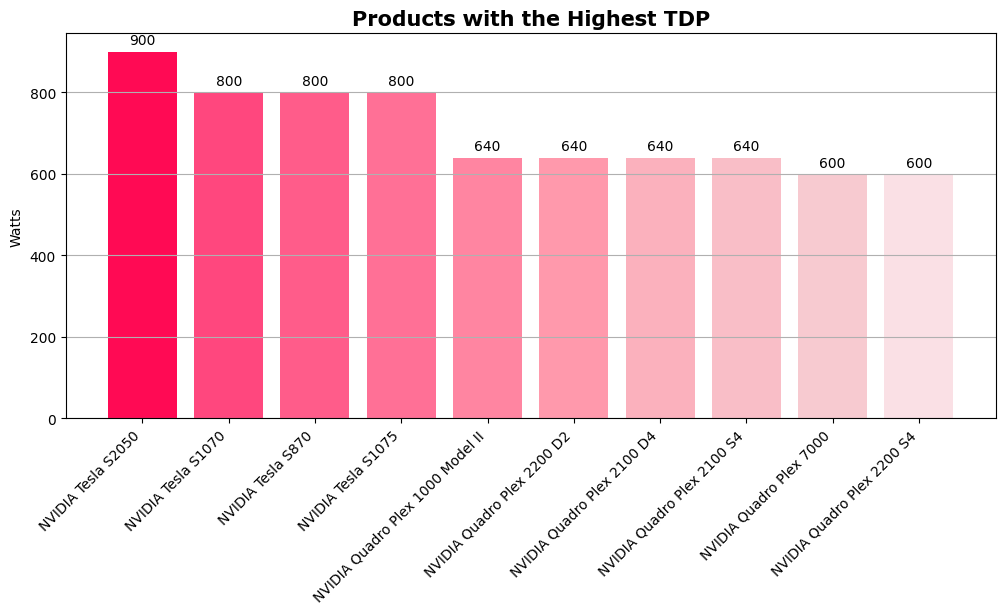

In [85]:
df_tdphighest = df_tdp.sort_values(by='TDP', ascending=False)
df_tdphighest = df_tdphighest.head(10)
plt.figure(figsize=(12,5))
bars = plt.bar(df_tdphighest['Product'], df_tdphighest['TDP'],
         color = ['#FF0A54','#FF477E','#FF5C8A','#FF7096','#FF85A1',
                 '#FF99AC','#FBB1BD','#F9BEC7','#F7CAD0','#FAE0E5'])

plt.bar_label(bars, label_type='edge', padding=3)  

plt.title('Products with the Highest TDP',
          fontfamily='Verdana',
          fontsize=15,
          fontweight='bold')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='-', alpha=1)
plt.show()


The bar chart displays the NVIDIA products with the highest Thermal Design Power (TDP), measured in watts. The NVIDIA Tesla S2050 leads with 900W, followed by Tesla S1070, S870, and S1075, each at 800W. Other high-TDP products include the Quadro Plex series, ranging between 640W and 600W. The high power consumption of these GPUs implies that they are designed for high-performance computing tasks, such as AI, scientific simulations, and large-scale rendering, rather than consumer gaming. Such high TDP values require advanced cooling solutions and substantial power supply capabilities, making them suitable for data centers and professional workstations rather than personal use.

### CPU Lowest TDP

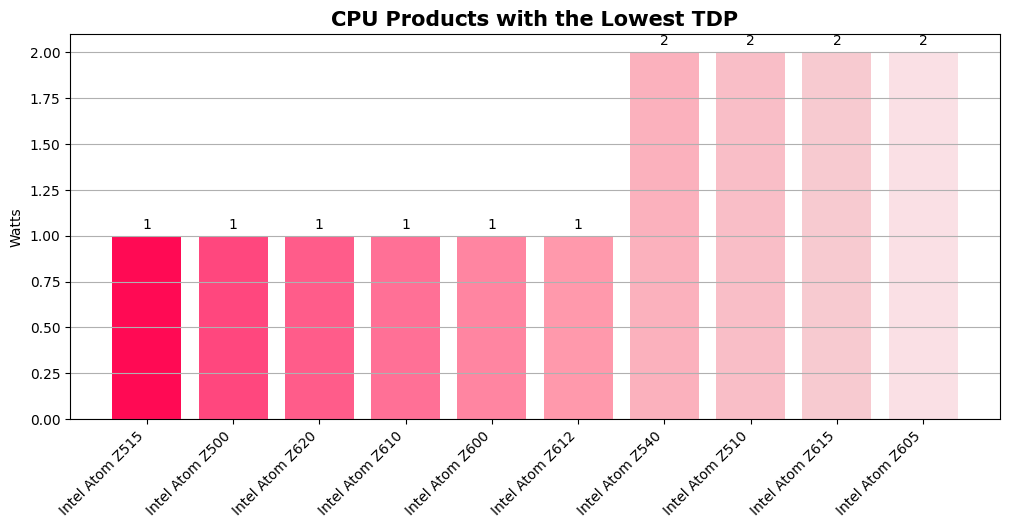

In [26]:
df_tdphlowestcpu = df_w[df_w['Type'] == 'CPU'][['Product', 'TDP']]
df_tdplowestcpu = df_tdphlowestcpu.sort_values(by='TDP')
df_tdplowestcpu = df_tdplowestcpu.head(10)

plt.figure(figsize=(12,5))
bars = plt.bar(df_tdplowestcpu['Product'],
               df_tdplowestcpu['TDP'],
               color=['#FF0A54','#FF477E','#FF5C8A','#FF7096','#FF85A1',
                     '#FF99AC','#FBB1BD','#F9BEC7','#F7CAD0','#FAE0E5'])
plt.bar_label(bars, label_type='edge', padding=3)   

plt.title('CPU Products with the Lowest TDP',
          fontfamily='Verdana',
          fontsize=15,
          fontweight='bold')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='-', alpha=1)
plt.show()

The bar chart presents Intel Atom CPUs with the lowest Thermal Design Power (TDP), ranging from 1W to 2W. The lowest power consumption CPUs include the Intel Atom Z515, Z500, Z620, Z610, Z600, and Z612, each operating at just 1W. Slightly higher but still very power-efficient are the Z540, Z510, Z515, and Z605 models, each with a 2W TDP. These ultra-low TDP values indicate that these processors are designed for energy efficiency rather than raw performance. They are typically used in low-power devices such as embedded systems, tablets, and netbooks, where battery life and minimal heat generation are more critical than processing power. This makes them ideal for mobile computing and IoT applications, where extended operation without frequent charging or active cooling is essential.

### CPU Highest TDP

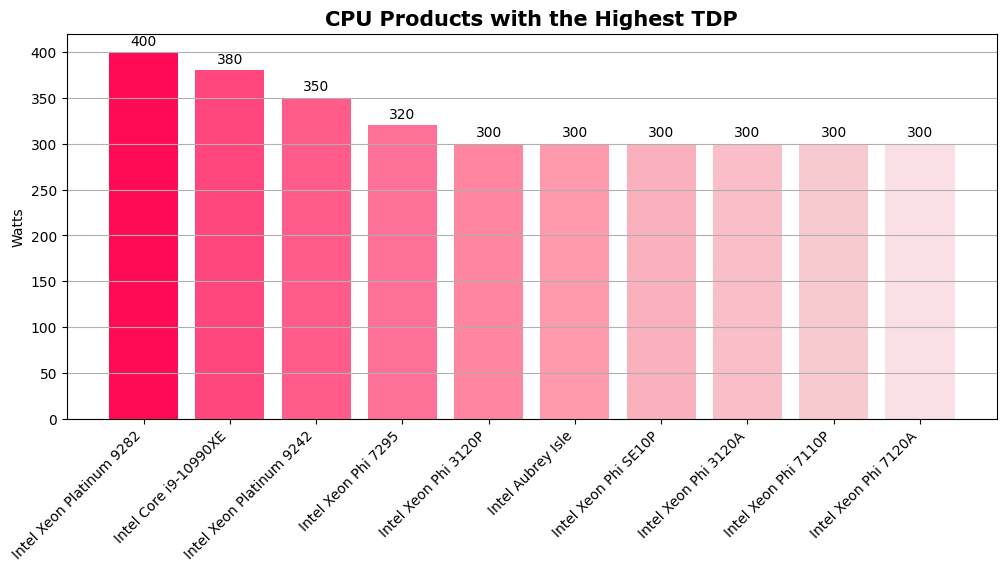

In [27]:
df_tdphighestcpu = df_w[df_w['Type'] == 'CPU'][['Product', 'TDP']]
df_tdphighestcpu = df_tdphighestcpu.sort_values(by='TDP', ascending=False)
df_tdphighestcpu = df_tdphighestcpu.head(10)

plt.figure(figsize=(12,5))
bars = plt.bar(df_tdphighestcpu['Product'],
               df_tdphighestcpu['TDP'],
               color=['#FF0A54','#FF477E','#FF5C8A','#FF7096','#FF85A1',
                     '#FF99AC','#FBB1BD','#F9BEC7','#F7CAD0','#FAE0E5'])
plt.bar_label(bars, label_type='edge', padding=3)   

plt.title('CPU Products with the Highest TDP', 
          fontfamily='Verdana',
          fontsize=15,
          fontweight='bold')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='-', alpha=1)
plt.show()

The bar chart illustrates Intel CPU products with the highest Thermal Design Power (TDP), with values ranging from 300W to 400W. The Intel Xeon Platinum 9282 leads with a massive 400W TDP, followed by the Intel Core i9-10980XE at 380W and the Xeon Platinum 9242 at 350W. The Xeon Phi series also features prominently, with models such as the 7295 (320W) and multiple 300W variants. These high TDP values indicate processors designed for extreme workloads, such as data centers, high-performance computing (HPC), and AI training, where raw processing power is prioritized over energy efficiency. Such CPUs require robust cooling solutions, likely involving liquid cooling or advanced air cooling, and substantial power delivery infrastructure. Their high power consumption means they are unsuitable for consumer applications but are crucial for enterprise and research environments requiring maximum computational throughput.

### GPU Lowest TDP

In [28]:
df_gpu_tdp = df_w[df_w['Type'] == 'GPU'][['Product', 'TDP']]
df_tdphighestgpu = df_gpu_tdp.copy()
df_gpu_tdp = df_gpu_tdp.sort_values(by='TDP')
df_gpu_tdp = df_gpu_tdp.head(10)

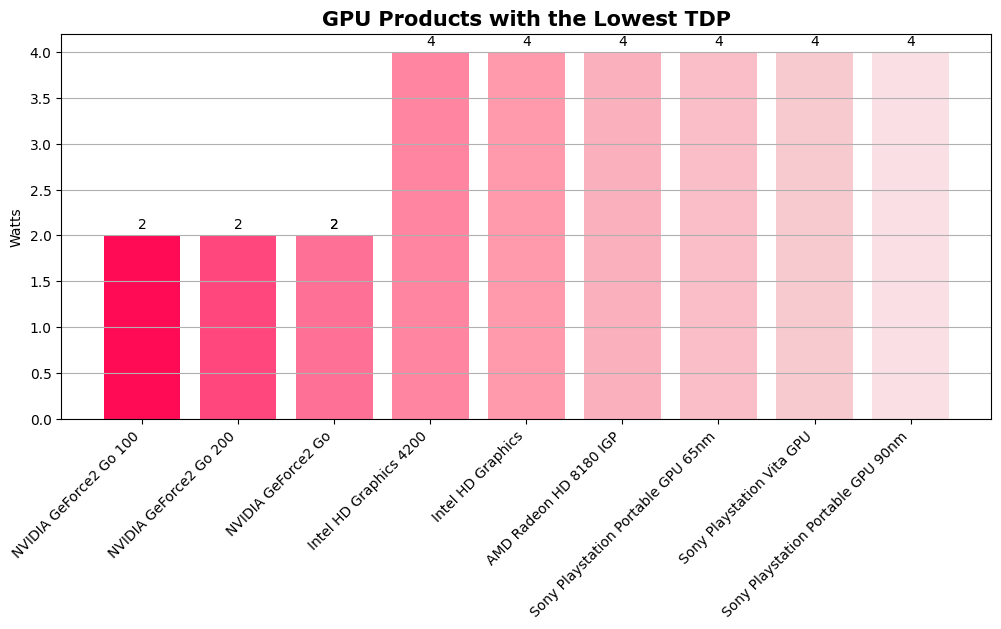

In [29]:
plt.figure(figsize=(12,5))
bars = plt.bar(df_gpu_tdp['Product'],  
         df_gpu_tdp['TDP'],
         color=['#FF0A54','#FF477E','#FF5C8A','#FF7096','#FF85A1',
                '#FF99AC','#FBB1BD','#F9BEC7','#F7CAD0','#FAE0E5'])
plt.bar_label(bars, label_type='edge', padding=3)  

plt.title('GPU Products with the Lowest TDP',
          fontfamily='Verdana',
          fontsize=15,
          fontweight='bold')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='-', alpha=1)
plt.show()

The chart displays GPUs with the lowest TDP, highlighting energy efficiency and suitability for portable or low-power devices. NVIDIA GeForce2 Go 100, GeForce2 Go 200, and GeForce2 Go lead with a remarkably low 2 watts. Intel's integrated HD Graphics 4200 and other variants, along with AMD Radeon HD B180 IGP, show slightly higher but equally impressive efficiency at 4 watts. This group also includes GPUs designed for portable gaming consoles, such as the Sony PlayStation Portable GPUs, indicating their emphasis on battery life and lightweight performance for mobile applications. This stark contrast to high-TDP GPUs emphasizes their role in energy-saving and compact design scenarios.

### GPU Highest TDP

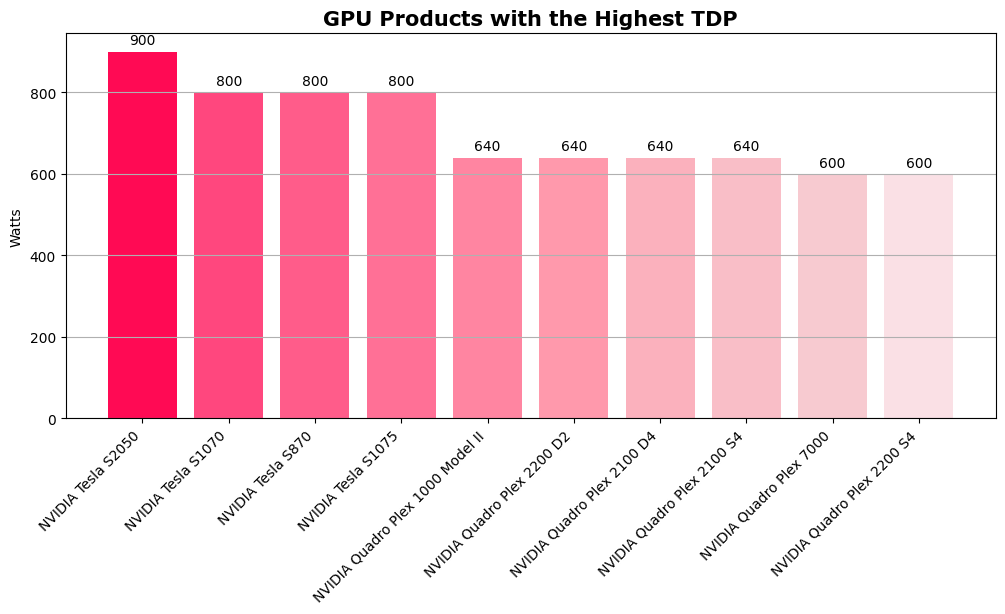

In [30]:
df_tdphighestgpu = df_w[df_w['Type'] == 'GPU'][['Product', 'TDP']]
df_tdphighestgpu = df_tdphighestgpu.sort_values(by='TDP', ascending=False)
df_tdphighestgpu = df_tdphighestgpu.head(10)

plt.figure(figsize=(12,5))
bars = plt.bar(df_tdphighestgpu['Product'],
               df_tdphighestgpu['TDP'],
               color=['#FF0A54','#FF477E','#FF5C8A','#FF7096','#FF85A1',
                     '#FF99AC','#FBB1BD','#F9BEC7','#F7CAD0','#FAE0E5'])
plt.bar_label(bars, label_type='edge', padding=3)   

plt.title('GPU Products with the Highest TDP',  
          fontfamily='Verdana',
          fontsize=15,
          fontweight='bold')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='-', alpha=1)
plt.show()

The chart showcases the GPU products with the highest TDP (Thermal Design Power), which measures the maximum amount of power the GPU can consume under peak performance. The NVIDIA Tesla S2050 dominates the list with an extraordinary 900 watts, followed by Tesla models S1070, S870, and S1075, each with 800 watts. The Quadro Plex series models then take over with 640 watts, showcasing their high-performance design for professional workloads. This analysis highlights that these GPUs are tailored for extremely demanding tasks like AI, scientific simulations, and professional rendering, requiring robust cooling systems and power supplies.

### CPU TDP Trend

In [31]:
dfc = df_w[['Type','Date','TDP']].where(df_w['Type']=='CPU').dropna()
dfc

,Type,Date,TDP
0,CPU,2/20/2007,45.0
1,CPU,9/6/2018,35.0
2,CPU,9/2/2020,28.0
3,CPU,9/1/2013,80.0
4,CPU,5/3/2011,125.0
...,...,...,...
2187,CPU,4/6/2021,185.0
2188,CPU,3/16/2020,54.0
2189,CPU,7/1/2007,65.0
2190,CPU,12/1/2004,85.0


In [32]:
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Year'] = dfc['Date'].dt.year
dfc 

,Type,Date,TDP,Year
0,CPU,2007-02-20,45.0,2007.0
1,CPU,2018-09-06,35.0,2018.0
2,CPU,2020-09-02,28.0,2020.0
3,CPU,2013-09-01,80.0,2013.0
4,CPU,2011-05-03,125.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,185.0,2021.0
2188,CPU,2020-03-16,54.0,2020.0
2189,CPU,2007-07-01,65.0,2007.0
2190,CPU,2004-12-01,85.0,2004.0


In [33]:
dfc = dfc.groupby('Year')['TDP'].mean().reset_index()
dfc

,Year,TDP
0,2000.0,50.470588
1,2001.0,59.186047
2,2002.0,68.487179
3,2003.0,73.630137
4,2004.0,78.250000
5,2005.0,79.525974
6,2006.0,72.822222
7,2007.0,56.608696
8,2008.0,63.589286
9,2009.0,74.426087


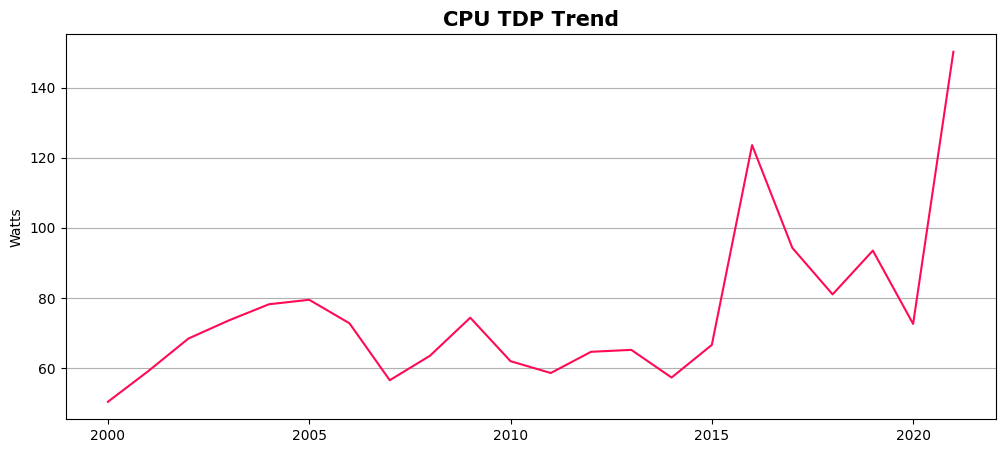

In [34]:
plt.figure(figsize=(12,5))
plt.plot(dfc['Year'],dfc['TDP'], color='#FF0A54')
plt.title('CPU TDP Trend',
          fontfamily='Verdana',
          fontsize=15,
          fontweight='bold')
plt.ylabel('Watts')
plt.grid(axis='y', linestyle='-', alpha=1)

The CPU TDP trend from 2000 to 2020 shows a complex evolution in power consumption patterns. From 2000 to 2005, there was a gradual increase from around 60W to 80W, followed by relative stability until 2015. However, post-2015, the trend becomes more volatile with a dramatic spike to about 120W, followed by fluctuations. The most striking feature is the sharp increase in 2020, reaching approximately 145W, suggesting a significant shift in CPU design philosophy where manufacturers are prioritizing performance even at the cost of higher power consumption. This could be attributed to the increasing demands of modern computing applications and the competitive pressure to deliver higher performance.

### GPU TDP Trends

In [35]:
dfcgpu = df_w[['Type','Date','TDP']].where(df_w['Type']=='GPU').dropna()
dfcgpu

,Type,Date,TDP
2192,GPU,4/3/2011,95.000000
2193,GPU,6/25/2002,81.359981
2194,GPU,2/23/2019,25.000000
2195,GPU,3/2/2008,81.359981
2196,GPU,9/30/2008,20.000000
...,...,...,...
4849,GPU,2/22/2011,75.000000
4850,GPU,6/1/2005,7.000000
4851,GPU,3/3/2010,23.000000
4852,GPU,3/6/2003,81.359981


In [36]:
dfcgpu['Date'] = pd.to_datetime(dfcgpu['Date'])
dfcgpu['Year'] = dfcgpu['Date'].dt.year
dfcgpu

,Type,Date,TDP,Year
2192,GPU,2011-04-03,95.000000,2011.0
2193,GPU,2002-06-25,81.359981,2002.0
2194,GPU,2019-02-23,25.000000,2019.0
2195,GPU,2008-03-02,81.359981,2008.0
2196,GPU,2008-09-30,20.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,75.000000,2011.0
4850,GPU,2005-06-01,7.000000,2005.0
4851,GPU,2010-03-03,23.000000,2010.0
4852,GPU,2003-03-06,81.359981,2003.0


In [37]:
dfcgpu = dfcgpu.groupby('Year')['TDP'].mean().reset_index()
dfcgpu

,Year,TDP
0,2000.0,55.258657
1,2001.0,65.297946
2,2002.0,75.419693
3,2003.0,69.121414
4,2004.0,68.908296
5,2005.0,75.262725
6,2006.0,63.032552
7,2007.0,69.652653
8,2008.0,95.534565
9,2009.0,73.114337


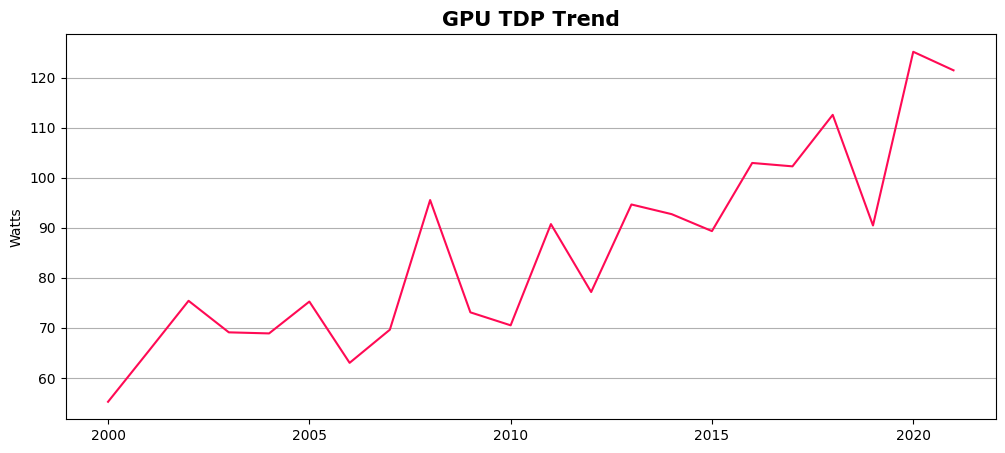

In [38]:

plt.figure(figsize=(12,5))
plt.plot(dfcgpu['Year'],dfcgpu['TDP'], color='#FF0A54')
plt.title('GPU TDP Trend',
          fontfamily='Verdana',
          fontsize=15,
          fontweight='bold')
plt.ylabel('Watts')
plt.grid(axis='y', linestyle='-', alpha=1)

The GPU TDP trend over the same period shows a generally upward trajectory but with distinct characteristics. Starting from around 60W in 2000, the trend shows moderate fluctuations until 2008, hovering between 65-75W. After 2008, there's a noticeable shift with more pronounced variations and an overall upward trend, reaching peaks around 95W in 2010 and gradually climbing to 120W by 2020. The pattern suggests a more gradual and consistent increase in power requirements compared to CPUs, though still showing an clear upward trend. This likely reflects the growing importance of graphics processing in modern computing, particularly with the rise of gaming, AI, and cryptocurrency mining applications.

## CPU and GPU Process Size Trend

### CPU Process Size Trend

In [39]:
dfccpu = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='CPU').dropna()
dfccpu

,Type,Date,Process_Size
0,CPU,2/20/2007,65.0
1,CPU,9/6/2018,14.0
2,CPU,9/2/2020,10.0
3,CPU,9/1/2013,22.0
4,CPU,5/3/2011,45.0
...,...,...,...
2187,CPU,4/6/2021,10.0
2188,CPU,3/16/2020,7.0
2189,CPU,7/1/2007,65.0
2190,CPU,12/1/2004,90.0


In [40]:
dfccpu['Date'] = pd.to_datetime(dfccpu['Date'])
dfccpu['Year'] = dfccpu['Date'].dt.year
dfccpu 

,Type,Date,Process_Size,Year
0,CPU,2007-02-20,65.0,2007.0
1,CPU,2018-09-06,14.0,2018.0
2,CPU,2020-09-02,10.0,2020.0
3,CPU,2013-09-01,22.0,2013.0
4,CPU,2011-05-03,45.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,10.0,2021.0
2188,CPU,2020-03-16,7.0,2020.0
2189,CPU,2007-07-01,65.0,2007.0
2190,CPU,2004-12-01,90.0,2004.0


In [41]:
dfccpu = dfccpu.groupby('Year')['Process_Size'].mean().reset_index()
dfccpu

,Year,Process_Size
0,2000.0,180.000000
1,2001.0,137.790698
2,2002.0,132.564103
3,2003.0,130.000000
4,2004.0,109.705882
5,2005.0,92.954545
6,2006.0,75.925926
7,2007.0,70.869565
8,2008.0,58.571429
9,2009.0,45.913043


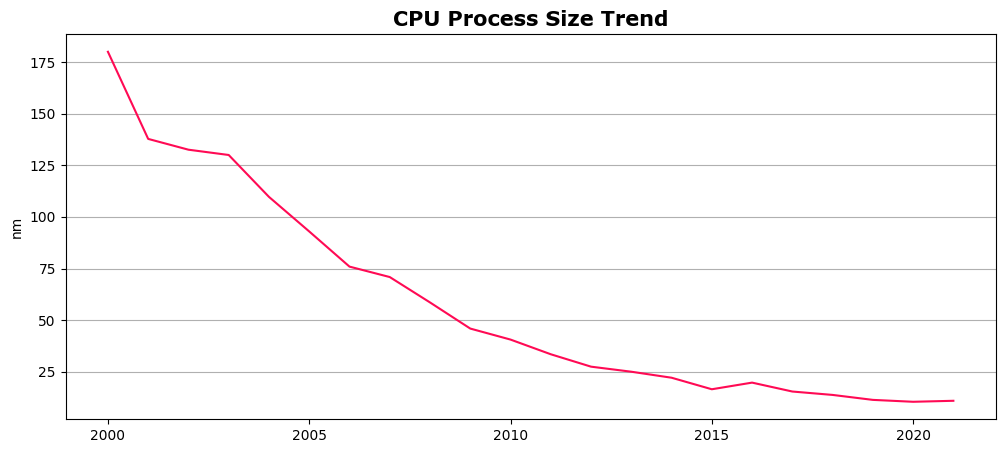

In [42]:
plt.figure(figsize=(12,5))
plt.plot(dfccpu['Year'],dfccpu['Process_Size'], color='#FF0A54')
plt.title('CPU Process Size Trend',
          fontfamily='Verdana',
          fontsize=15,
          fontweight='bold')
plt.ylabel('nm')
plt.grid(axis='y', linestyle='-', alpha=1)

The CPU manufacturing process size shows a consistent downward trend from 2000 to 2020, demonstrating Moore's Law in action. Starting from approximately 175nm in 2000, the process size decreased rapidly to around 130nm by 2002, then continued its descent more gradually. The trend shows particularly significant reductions between 2005 and 2010, followed by a more moderate decline from 2015 to 2020, eventually reaching around 10nm. This reduction in process size has enabled manufacturers to pack more transistors into smaller spaces, leading to increased performance and energy efficiency, though the slowing rate of decrease in recent years suggests we're approaching physical limitations in silicon-based manufacturing.

### GPU Process Size Trend

In [43]:
dfgpu = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='GPU').dropna()
dfgpu

,Type,Date,Process_Size
2192,GPU,4/3/2011,32.0
2193,GPU,6/25/2002,150.0
2194,GPU,2/23/2019,14.0
2195,GPU,3/2/2008,130.0
2196,GPU,9/30/2008,55.0
...,...,...,...
4849,GPU,2/22/2011,40.0
4850,GPU,6/1/2005,90.0
4851,GPU,3/3/2010,40.0
4852,GPU,3/6/2003,150.0


In [44]:
dfgpu['Date'] = pd.to_datetime(dfgpu['Date'])
dfgpu['Year'] = dfgpu['Date'].dt.year
dfgpu

,Type,Date,Process_Size,Year
2192,GPU,2011-04-03,32.0,2011.0
2193,GPU,2002-06-25,150.0,2002.0
2194,GPU,2019-02-23,14.0,2019.0
2195,GPU,2008-03-02,130.0,2008.0
2196,GPU,2008-09-30,55.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,40.0,2011.0
4850,GPU,2005-06-01,90.0,2005.0
4851,GPU,2010-03-03,40.0,2010.0
4852,GPU,2003-03-06,150.0,2003.0


In [45]:
dfgpu= dfgpu.groupby('Year')['Process_Size'].mean().reset_index()
dfgpu

,Year,Process_Size
0,2000.0,180.673973
1,2001.0,162.757339
2,2002.0,153.913043
3,2003.0,140.982143
4,2004.0,121.384615
5,2005.0,112.315789
6,2006.0,93.178295
7,2007.0,80.031646
8,2008.0,63.439306
9,2009.0,52.785087


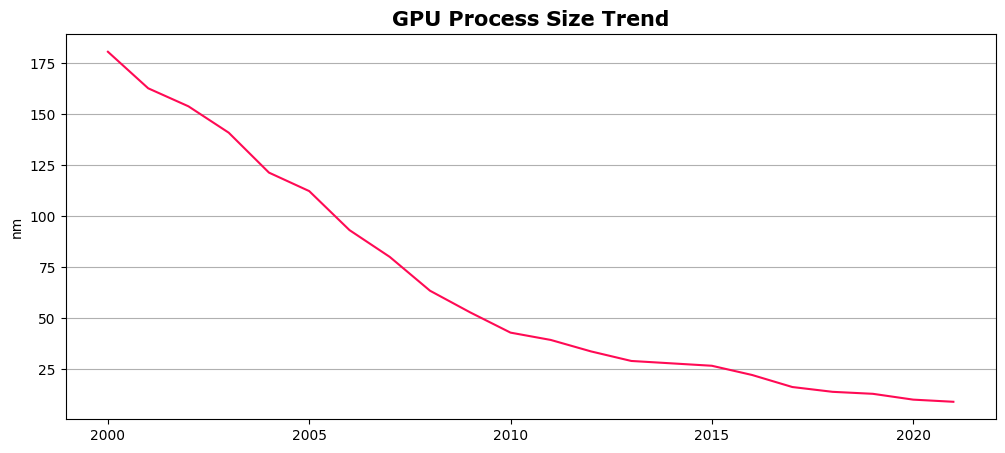

In [46]:
plt.figure(figsize=(12,5))
plt.plot(dfgpu['Year'],dfgpu['Process_Size'], color='#FF0A54')
plt.title('GPU Process Size Trend',
          fontfamily='Verdana',
          fontsize=15,
          fontweight='bold')
plt.ylabel('nm')
plt.grid(axis='y', linestyle='-', alpha=1)

The GPU process size trend mirrors the CPU trend remarkably closely, also starting at around 175nm in 2000 and following a similar downward trajectory over the 20-year period. This parallel evolution suggests that GPU manufacturers have been able to leverage the same semiconductor manufacturing advances as CPU makers. The curve shows a steep decline from 2000 to 2005, followed by a more gradual decrease through 2010, and then an even more modest reduction rate from 2015 to 2020. This trend reflects the industry-wide push toward miniaturization, though the similarities with CPU process sizes indicate that both types of processors face similar physical and technological constraints in manufacturing processes.

In [47]:
df_ps = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='GPU').dropna()
df_ps

,Type,Date,Process_Size
2192,GPU,4/3/2011,32.0
2193,GPU,6/25/2002,150.0
2194,GPU,2/23/2019,14.0
2195,GPU,3/2/2008,130.0
2196,GPU,9/30/2008,55.0
...,...,...,...
4849,GPU,2/22/2011,40.0
4850,GPU,6/1/2005,90.0
4851,GPU,3/3/2010,40.0
4852,GPU,3/6/2003,150.0


In [48]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps 

,Type,Date,Process_Size,Year
2192,GPU,2011-04-03,32.0,2011.0
2193,GPU,2002-06-25,150.0,2002.0
2194,GPU,2019-02-23,14.0,2019.0
2195,GPU,2008-03-02,130.0,2008.0
2196,GPU,2008-09-30,55.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,40.0,2011.0
4850,GPU,2005-06-01,90.0,2005.0
4851,GPU,2010-03-03,40.0,2010.0
4852,GPU,2003-03-06,150.0,2003.0


In [49]:
df_ps = df_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_ps

,Year,Process_Size
0,2000.0,180.673973
1,2001.0,162.757339
2,2002.0,153.913043
3,2003.0,140.982143
4,2004.0,121.384615
5,2005.0,112.315789
6,2006.0,93.178295
7,2007.0,80.031646
8,2008.0,63.439306
9,2009.0,52.785087


## CPU and GPU Die Size Trend

### CPU Die Size Trend

In [50]:
dfpscpu = df_w[['Type','Date','Die_Size']].where(df_w['Type']=='CPU').dropna()
dfpscpu

,Type,Date,Die_Size
0,CPU,2/20/2007,77.000000
1,CPU,9/6/2018,192.000000
2,CPU,9/2/2020,188.440445
3,CPU,9/1/2013,160.000000
4,CPU,5/3/2011,258.000000
...,...,...,...
2187,CPU,4/6/2021,188.440445
2188,CPU,3/16/2020,156.000000
2189,CPU,7/1/2007,143.000000
2190,CPU,12/1/2004,188.440445


In [51]:
dfpscpu['Date'] = pd.to_datetime(dfpscpu['Date'])
dfpscpu['Year'] = dfpscpu['Date'].dt.year
dfpscpu

,Type,Date,Die_Size,Year
0,CPU,2007-02-20,77.000000,2007.0
1,CPU,2018-09-06,192.000000,2018.0
2,CPU,2020-09-02,188.440445,2020.0
3,CPU,2013-09-01,160.000000,2013.0
4,CPU,2011-05-03,258.000000,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,188.440445,2021.0
2188,CPU,2020-03-16,156.000000,2020.0
2189,CPU,2007-07-01,143.000000,2007.0
2190,CPU,2004-12-01,188.440445,2004.0


In [52]:
dfpscpu = dfpscpu.groupby('Year')['Die_Size'].mean().reset_index()
dfpscpu

,Year,Die_Size
0,2000.0,129.058824
1,2001.0,124.872093
2,2002.0,130.641026
3,2003.0,168.835123
4,2004.0,148.858889
5,2005.0,155.710329
6,2006.0,172.474156
7,2007.0,134.437713
8,2008.0,163.509349
9,2009.0,185.695652


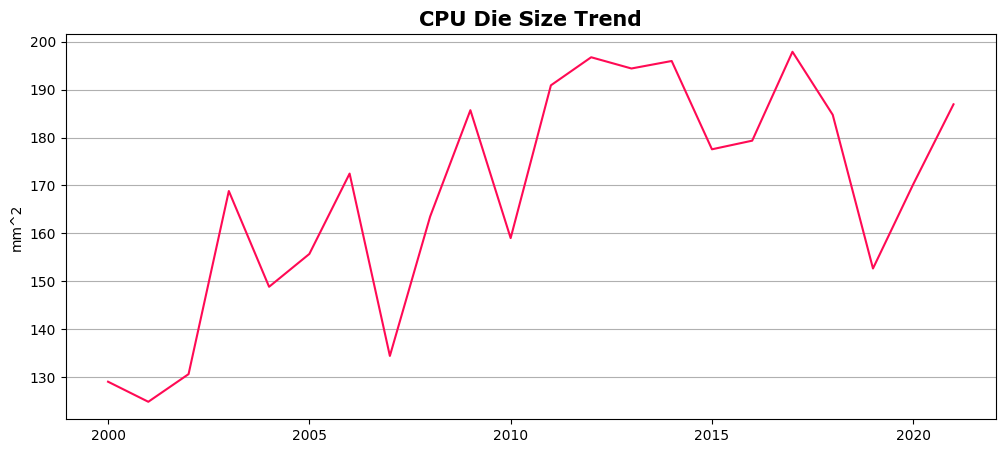

In [53]:
plt.figure(figsize=(12,5))
plt.plot(dfpscpu['Year'],dfpscpu['Die_Size'], color='#FF0A54')
plt.title('CPU Die Size Trend',
          fontfamily='Verdana',
          fontsize=15,
          fontweight='bold')
plt.ylabel('mm^2')
plt.grid(axis='y', linestyle='-', alpha=1)

The CPU die size has shown significant volatility over the past two decades, with several notable spikes and dips. Starting from around 130mm² in 2000, it experienced a sharp increase to 170mm² in 2003, followed by multiple fluctuations. A major valley appears in 2007 at approximately 135mm², followed by a steep rise to peak at about 195mm² around 2010-2011. The period between 2015-2020 shows particularly dramatic swings, including a significant drop to 150mm² in 2018 before recovering to about 185mm² by 2020. These fluctuations likely reflect the ongoing balance between manufacturing capabilities, thermal constraints, and the push for increased performance.

### GPU Die Size Trend

In [54]:
dfpsgpu = df_w[['Type','Date','Die_Size']].where(df_w['Type']=='GPU').dropna()
dfpsgpu

,Type,Date,Die_Size
2192,GPU,4/3/2011,216.000000
2193,GPU,6/25/2002,174.000000
2194,GPU,2/23/2019,132.000000
2195,GPU,3/2/2008,188.440445
2196,GPU,9/30/2008,73.000000
...,...,...,...
4849,GPU,2/22/2011,332.000000
4850,GPU,6/1/2005,188.440445
4851,GPU,3/3/2010,100.000000
4852,GPU,3/6/2003,65.000000


In [55]:
dfpsgpu['Date'] = pd.to_datetime(dfpsgpu['Date'])
dfpsgpu['Year'] = dfpsgpu['Date'].dt.year
dfpsgpu

,Type,Date,Die_Size,Year
2192,GPU,2011-04-03,216.000000,2011.0
2193,GPU,2002-06-25,174.000000,2002.0
2194,GPU,2019-02-23,132.000000,2019.0
2195,GPU,2008-03-02,188.440445,2008.0
2196,GPU,2008-09-30,73.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,332.000000,2011.0
4850,GPU,2005-06-01,188.440445,2005.0
4851,GPU,2010-03-03,100.000000,2010.0
4852,GPU,2003-03-06,65.000000,2003.0


In [56]:
dfpsgpu = dfpsgpu.groupby('Year')['Die_Size'].mean().reset_index()
dfpsgpu

,Year,Die_Size
0,2000.0,106.848015
1,2001.0,111.924925
2,2002.0,114.646995
3,2003.0,138.633286
4,2004.0,176.308971
5,2005.0,188.639598
6,2006.0,175.216775
7,2007.0,174.506855
8,2008.0,197.312619
9,2009.0,176.377358


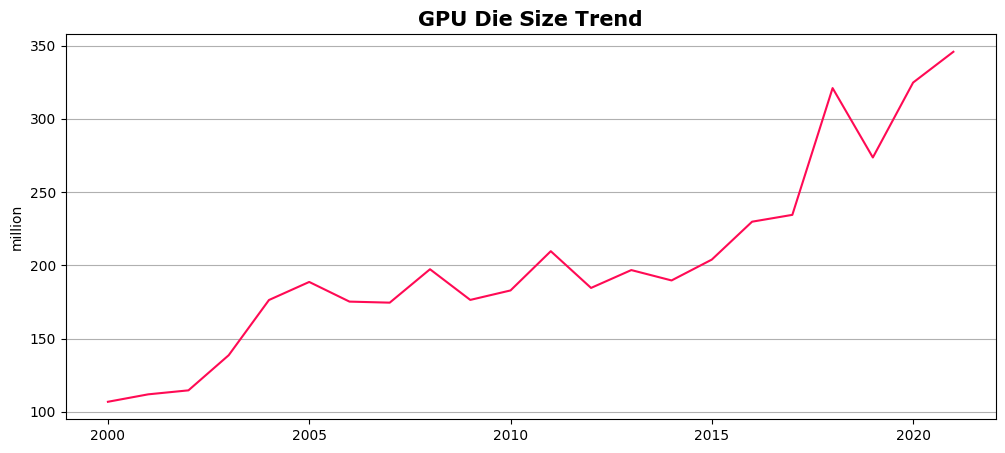

In [57]:
plt.figure(figsize=(12,5))
plt.plot(dfpsgpu['Year'],dfpsgpu['Die_Size'], color='#FF0A54')
plt.title('GPU Die Size Trend',
          fontfamily='Verdana',
          fontsize=15,
          fontweight='bold')
plt.ylabel('million')
plt.grid(axis='y', linestyle='-', alpha=1)

The GPU transistor count shows a much more consistent upward trend, particularly accelerating in recent years. From 2000 to 2010, there was a steady but moderate increase from about 100 million to 200 million transistors. However, the most dramatic growth occurred from 2015 onwards, where the count rose sharply from about 200 million to nearly 350 million transistors by 2020. This exponential growth in transistor count aligns with the increasing demands of modern graphics processing, particularly for gaming, AI, and computational workloads. The trend shows fewer fluctuations compared to CPU die sizes, suggesting a more straightforward scaling strategy in GPU development.

## CPU and GPU Transistor Trend

### CPU Transistor Trend

In [58]:
dftcpu = df_w[['Type','Date','Transistors']].where(df_w['Type']=='CPU').dropna()
dftcpu

,Type,Date,Transistors
0,CPU,2/20/2007,122.000000
1,CPU,9/6/2018,4800.000000
2,CPU,9/2/2020,1929.922279
3,CPU,9/1/2013,1400.000000
4,CPU,5/3/2011,758.000000
...,...,...,...
2187,CPU,4/6/2021,1929.922279
2188,CPU,3/16/2020,9800.000000
2189,CPU,7/1/2007,291.000000
2190,CPU,12/1/2004,106.000000


In [59]:
dftcpu['Date'] = pd.to_datetime(dftcpu['Date'])
dftcpu['Year'] = dftcpu['Date'].dt.year
dftcpu

,Type,Date,Transistors,Year
0,CPU,2007-02-20,122.000000,2007.0
1,CPU,2018-09-06,4800.000000,2018.0
2,CPU,2020-09-02,1929.922279,2020.0
3,CPU,2013-09-01,1400.000000,2013.0
4,CPU,2011-05-03,758.000000,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,1929.922279,2021.0
2188,CPU,2020-03-16,9800.000000,2020.0
2189,CPU,2007-07-01,291.000000,2007.0
2190,CPU,2004-12-01,106.000000,2004.0


In [60]:
dftcpu = dftcpu.groupby('Year')['Transistors'].mean().reset_index()
dftcpu

,Year,Transistors
0,2000.0,38.000000
1,2001.0,65.197674
2,2002.0,51.846154
3,2003.0,89.315068
4,2004.0,104.213235
5,2005.0,230.580378
6,2006.0,478.256880
7,2007.0,398.007734
8,2008.0,606.076101
9,2009.0,533.860870


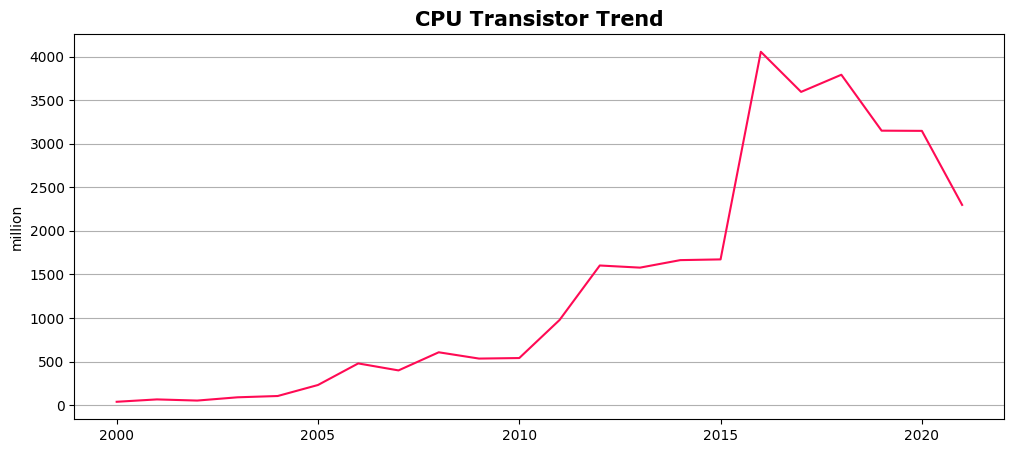

In [61]:
plt.figure(figsize=(12,5))
plt.plot(dftcpu['Year'],dftcpu['Transistors'], color='#FF0A54')
plt.title('CPU Transistor Trend',
          fontfamily='Verdana',
          fontsize=15,
          fontweight='bold')
plt.ylabel('million')
plt.grid(axis='y', linestyle='-', alpha=1)

The CPU transistor count shows a relatively steady increase from 2000 to 2015, with transistor counts growing from around 100 million to about 1.5 billion. However, there's a dramatic spike in 2015, jumping to approximately 4 billion transistors. After 2015, there's notable volatility with several peaks and valleys, and a concerning downward trend from 2017 to 2020, dropping from about 3.8 billion to 2.3 billion transistors. This decline might indicate that CPU manufacturers are hitting physical limitations in silicon manufacturing or shifting focus to other performance metrics besides raw transistor count. It could also suggest a move toward specialized architectures or a prioritization of efficiency over pure transistor density.

### GPU Transistor Trend

In [62]:
dftgpu = df_w[['Type','Date','Transistors']].where(df_w['Type']=='GPU').dropna()
dftgpu

,Type,Date,Transistors
2192,GPU,4/3/2011,1160.000000
2193,GPU,6/25/2002,80.000000
2194,GPU,2/23/2019,3300.000000
2195,GPU,3/2/2008,1929.922279
2196,GPU,9/30/2008,242.000000
...,...,...,...
4849,GPU,2/22/2011,1950.000000
4850,GPU,6/1/2005,1929.922279
4851,GPU,3/3/2010,486.000000
4852,GPU,3/6/2003,29.000000


In [63]:
dftgpu['Date'] = pd.to_datetime(dftgpu['Date'])
dftgpu['Year'] = dftgpu['Date'].dt.year
dftgpu

,Type,Date,Transistors,Year
2192,GPU,2011-04-03,1160.000000,2011.0
2193,GPU,2002-06-25,80.000000,2002.0
2194,GPU,2019-02-23,3300.000000,2019.0
2195,GPU,2008-03-02,1929.922279,2008.0
2196,GPU,2008-09-30,242.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,1950.000000,2011.0
4850,GPU,2005-06-01,1929.922279,2005.0
4851,GPU,2010-03-03,486.000000,2010.0
4852,GPU,2003-03-06,29.000000,2003.0


In [64]:
dftgpu = dftgpu.groupby('Year')['Transistors'].mean().reset_index()
dftgpu

,Year,Transistors
0,2000.0,215.525561
1,2001.0,119.568256
2,2002.0,104.273110
3,2003.0,139.747224
4,2004.0,332.929494
5,2005.0,294.678484
6,2006.0,348.024983
7,2007.0,388.793041
8,2008.0,566.823445
9,2009.0,613.830189


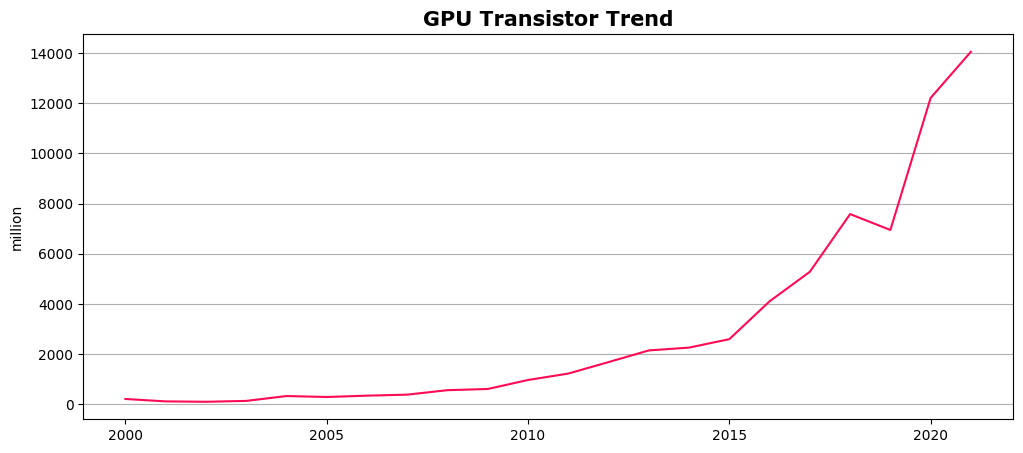

In [65]:
plt.figure(figsize=(12,5))
plt.plot(dftgpu['Year'],dftgpu['Transistors'], color='#FF0A54')
plt.title('GPU Transistor Trend',
          fontfamily='Verdana',
          fontsize=15,
          fontweight='bold')
plt.ylabel('million')
plt.grid(axis='y', linestyle='-', alpha=1)

The GPU transistor evolution tells a markedly different story. From 2000 to 2010, growth was modest and linear, similar to CPUs. However, post-2010, GPUs show exponential growth, particularly accelerating after 2015. The most striking feature is the sharp upward trajectory from 2018 to 2020, where transistor counts surge from about 7 billion to nearly 14 billion. This dramatic increase reflects the growing importance of GPUs in modern computing, especially for AI/ML workloads, graphics processing, and parallel computing tasks. The sustained upward trend suggests that GPU architects are still finding ways to pack more transistors into their designs, unlike the CPU plateau.

## CPU and GPU Frequency Trend

### CPU Frequency Trend

In [66]:
dffcpu = df_w[['Type','Date','Frequency']].where(df_w['Type']=='CPU').dropna()
dffcpu

,Type,Date,Frequency
0,CPU,2/20/2007,2200.0
1,CPU,9/6/2018,3200.0
2,CPU,9/2/2020,2600.0
3,CPU,9/1/2013,1800.0
4,CPU,5/3/2011,3700.0
...,...,...,...
2187,CPU,4/6/2021,2400.0
2188,CPU,3/16/2020,3300.0
2189,CPU,7/1/2007,2333.0
2190,CPU,12/1/2004,2000.0


In [67]:
dffcpu['Date'] = pd.to_datetime(dffcpu['Date'])
dffcpu['Year'] = dffcpu['Date'].dt.year
dffcpu

,Type,Date,Frequency,Year
0,CPU,2007-02-20,2200.0,2007.0
1,CPU,2018-09-06,3200.0,2018.0
2,CPU,2020-09-02,2600.0,2020.0
3,CPU,2013-09-01,1800.0,2013.0
4,CPU,2011-05-03,3700.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,2400.0,2021.0
2188,CPU,2020-03-16,3300.0,2020.0
2189,CPU,2007-07-01,2333.0,2007.0
2190,CPU,2004-12-01,2000.0,2004.0


In [68]:
dffcpu = dffcpu.groupby('Year')['Frequency'].mean().reset_index()
dffcpu

,Year,Frequency
0,2000.0,992.117647
1,2001.0,1801.662791
2,2002.0,2050.897436
3,2003.0,2155.369863
4,2004.0,2267.705882
5,2005.0,2409.831169
6,2006.0,2370.696296
7,2007.0,2180.652174
8,2008.0,2287.241071
9,2009.0,2519.904348


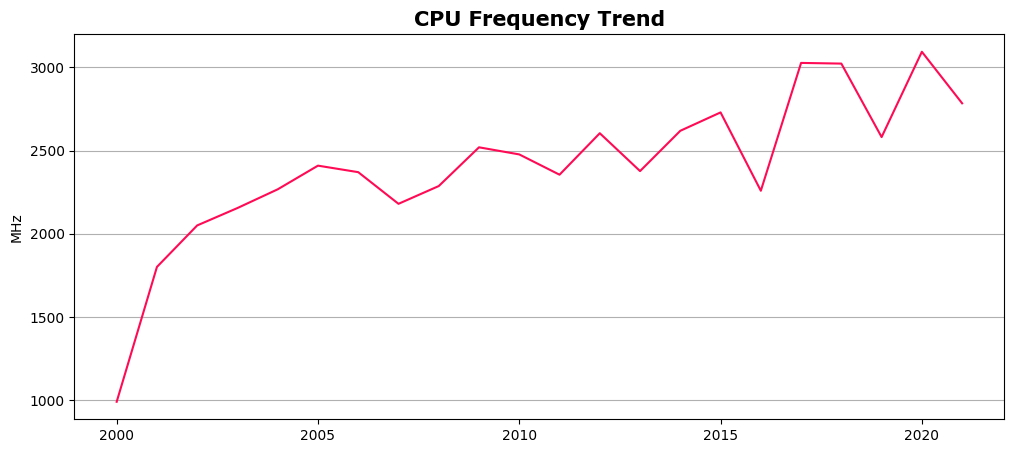

In [69]:
plt.figure(figsize=(12,5))
plt.plot(dffcpu['Year'],dffcpu['Frequency'], color='#FF0A54')
plt.title('CPU Frequency Trend',
          fontfamily='Verdana',
          fontsize=15,
          fontweight='bold')
plt.ylabel('MHz')
plt.grid(axis='y', linestyle='-', alpha=1)

The CPU frequency trend shows a dramatic initial increase from 2000 to 2002, jumping from around 1000 MHz to nearly 2000 MHz. After this initial surge, the growth significantly slowed, showing a more gradual increase from 2002 to 2015, hovering between 2000-2500 MHz. The period from 2015 to 2020 shows increased volatility with higher peaks reaching around 3000 MHz, but also notable dips. This pattern reflects the industry's shift away from purely chasing higher clock speeds (known as the end of the "frequency scaling era") due to power and thermal constraints. Instead of continuing to push frequencies higher, manufacturers began focusing on other ways to improve performance, such as adding more cores and improving architectural efficiency.

### GPU Frequency Trend

In [70]:
dffgpu = df_w[['Type','Date','Frequency']].where(df_w['Type']=='GPU').dropna()
dffgpu

,Type,Date,Frequency
2192,GPU,4/3/2011,100.0
2193,GPU,6/25/2002,200.0
2194,GPU,2/23/2019,1469.0
2195,GPU,3/2/2008,200.0
2196,GPU,9/30/2008,600.0
...,...,...,...
4849,GPU,2/22/2011,450.0
4850,GPU,6/1/2005,250.0
4851,GPU,3/3/2010,500.0
4852,GPU,3/6/2003,250.0


In [71]:
dffgpu['Date'] = pd.to_datetime(dffgpu['Date'])
dffgpu['Year'] = dffgpu['Date'].dt.year
dffgpu

,Type,Date,Frequency,Year
2192,GPU,2011-04-03,100.0,2011.0
2193,GPU,2002-06-25,200.0,2002.0
2194,GPU,2019-02-23,1469.0,2019.0
2195,GPU,2008-03-02,200.0,2008.0
2196,GPU,2008-09-30,600.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,450.0,2011.0
4850,GPU,2005-06-01,250.0,2005.0
4851,GPU,2010-03-03,500.0,2010.0
4852,GPU,2003-03-06,250.0,2003.0


In [72]:
dffgpu = dffgpu.groupby('Year')['Frequency'].mean().reset_index()
dffgpu

,Year,Frequency
0,2000.0,165.800000
1,2001.0,196.061224
2,2002.0,244.289855
3,2003.0,304.803571
4,2004.0,367.376923
5,2005.0,405.273684
6,2006.0,460.472868
7,2007.0,524.360759
8,2008.0,564.190751
9,2009.0,584.584906


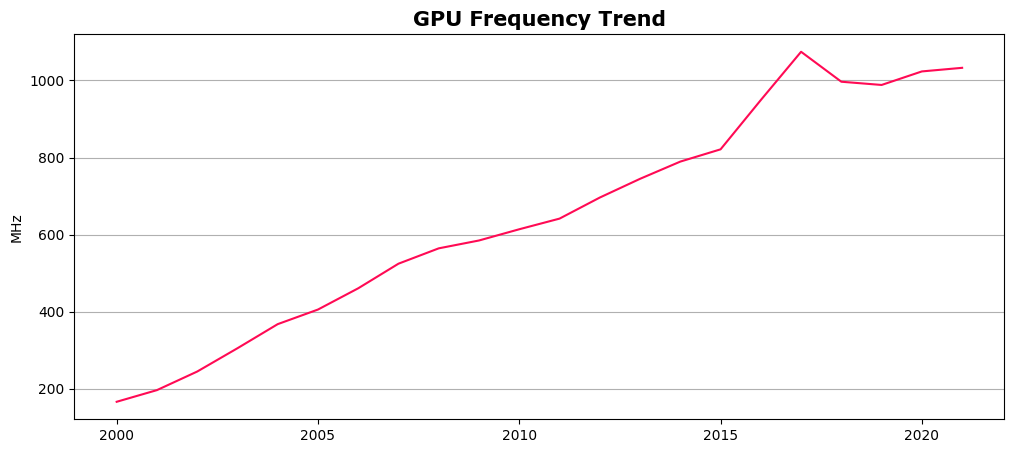

In [73]:
plt.figure(figsize=(12,5))
plt.plot(dffgpu['Year'],dffgpu['Frequency'], color='#FF0A54')
plt.title('GPU Frequency Trend',
          fontfamily='Verdana',
          fontsize=15,
          fontweight='bold')
plt.ylabel('MHz')
plt.grid(axis='y', linestyle='-', alpha=1)

The GPU frequency graph shows a remarkably different pattern compared to CPUs. Starting from around 200 MHz in 2000, GPUs demonstrated a consistent, almost linear increase in frequency up until 2015. After 2015, there was a steeper rise, reaching a peak of about 1050 MHz around 2017, followed by a slight decrease and stabilization around 1000 MHz through 2020. This more gradual and consistent increase suggests that GPU architectures had more headroom for frequency scaling compared to CPUs. The relatively steady growth also indicates that GPU manufacturers found ways to continue increasing clock speeds without hitting the same thermal and power barriers that affected CPU development. The plateau after 2017 might indicate that GPUs are finally reaching similar physical limitations, leading manufacturers to focus on other areas of improvement like parallel processing capabilities and memory bandwidth.

## Summary, Key Findings, Conclusion, and Recommendations

### TDP Distribution

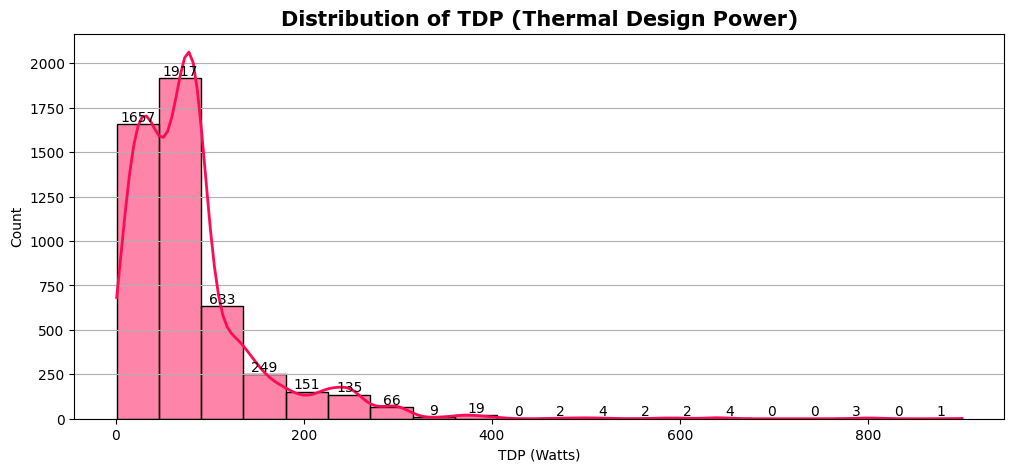

In [74]:
plt.figure(figsize=(12, 5))

ax = sns.histplot(
    df['TDP'],
    bins=20,
    kde=True,
    color='#FF0A54',
    line_kws={'color': '#F9BEC7',
              'linewidth': 2,
              'linestyle': '-'}
)

bars = ax.patches
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{int(height)}',  
        ha='center',
        va='bottom'
    )

plt.title("Distribution of TDP (Thermal Design Power)",
          fontfamily='Verdana',
          fontsize=15,
          fontweight='bold')
plt.xlabel("TDP (Watts)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='-', alpha=1)
plt.show()

The distribution of thermal design power (TDP) shows a concentration of processors with low to moderate TDP values, peaking at 1,917 units around the 50-100 watts range. The frequency decreases significantly as TDP increases, with very few processors exceeding 200 watts. This distribution highlights the industry's focus on energy-efficient designs that balance power consumption and performance. The implications suggest that most processors are optimized for mainstream applications, where energy efficiency and thermal management are critical. The smaller number of high-TDP processors reflects their niche use in performance-driven environments like data centers and high-end gaming. In conclusion, the data indicates a strong trend toward power-efficient designs, aligning with consumer demand for sustainable and cost-effective computing solutions while reserving high-TDP models for specialized needs.

c:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


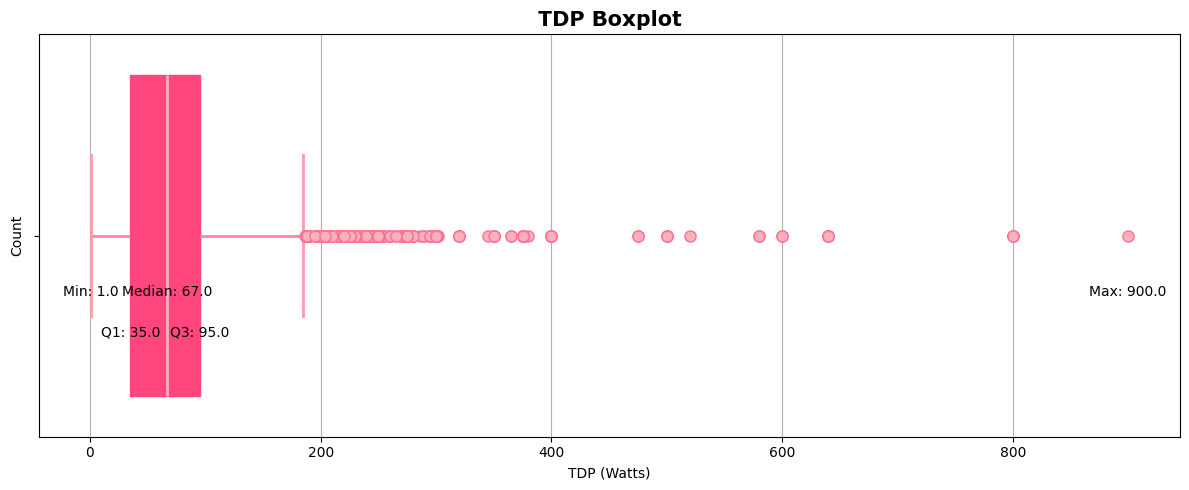

In [75]:
colors = ['#FF0A54', '#FF477E', '#FF5C8A', '#FF7096',
          '#FF85A1', '#FF99AC', '#FBB1BD', '#F9BEC7',
          '#F7CAD0', '#FAE0E5']

plt.figure(figsize=(12, 5))

bp = sns.boxplot(
    x=df['TDP'],
    boxprops=dict(facecolor=colors[0], color=colors[1]),
    flierprops=dict(marker='o', markerfacecolor=colors[6],
                    markersize=8, linestyle='none',
                    markeredgecolor=colors[3]),
    whiskerprops=dict(color=colors[4], linewidth=2),
    capprops=dict(color=colors[5], linewidth=2),
    medianprops=dict(color=colors[6], linewidth=2)
)

stats = df['TDP'].describe()

plt.text(stats['min'], -0.15, f'Min: {stats["min"]:.1f}', ha='center')
plt.text(stats['25%'], -0.25, f'Q1: {stats["25%"]:.1f}', ha='center')
plt.text(stats['50%'], -0.15, f'Median: {stats["50%"]:.1f}', ha='center')
plt.text(stats['75%'], -0.25, f'Q3: {stats["75%"]:.1f}', ha='center')
plt.text(stats['max'], -0.15, f'Max: {stats["max"]:.1f}', ha='center')

plt.title("TDP Boxplot",
          fontfamily='Verdana',
          fontsize=15,
          fontweight='bold')
plt.xlabel("TDP (Watts)")
plt.ylabel("Count")
plt.grid(axis='x', linestyle='-', alpha=1)

plt.ylim(-0.5, 0.5)  

plt.tight_layout()
plt.show()

The TDP boxplot provides a clear statistical summary of thermal design power distribution. The minimum TDP is 1 watt, the median is 67 watts, and the maximum reaches 900 watts, with the interquartile range (IQR) spanning from 35 watts (Q1) to 95 watts (Q3). Most processors fall within this range, reflecting a focus on moderate energy consumption. Outliers beyond 200 watts indicate specialized processors designed for high-performance applications. The implications suggest a strong industry emphasis on energy-efficient designs suitable for mainstream markets, while high-TDP processors cater to niche needs like gaming and server workloads. The distribution aligns with trends prioritizing sustainability and cost-efficiency. In conclusion, the boxplot highlights the industry's dual focus on balancing energy efficiency for general usage and delivering high power for specialized performance, ensuring diverse market demands are met effectively.

### Summary of CPU and GPU TDP Trends

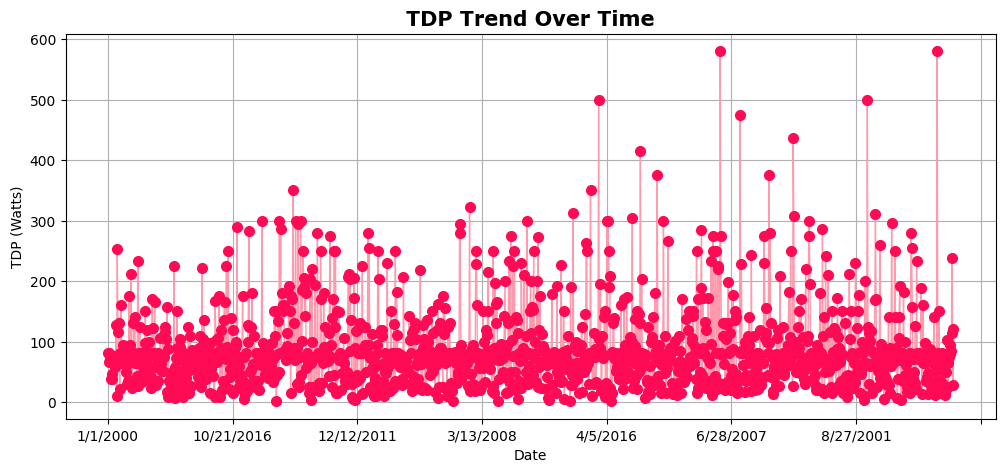

In [76]:
colors = ['#FF0A54', '#FF477E', '#FF5C8A', '#FF7096', 
          '#FF85A1', '#FF99AC', '#FBB1BD', '#F9BEC7', 
          '#F7CAD0', '#FAE0E5']

plt.figure(figsize=(12, 5))

df.groupby('Date')['TDP'].mean().plot(
    kind='line', 
    marker='o', 
    color=colors[5],
    markerfacecolor=colors[0],
    markeredgecolor=colors[0],
    markersize=7,
    linewidth=1
)

plt.title("TDP Trend Over Time", 
          fontfamily='Verdana', 
          fontsize=15, 
          fontweight='bold') 

plt.ylabel("TDP (Watts)")
plt.xlabel("Date")
plt.grid(axis='both', linestyle='-', alpha=1)

plt.show()

The TDP trend over time indicates a consistent range of power consumption among most processors, with the majority of TDP values clustering below 100 watts. However, sporadic spikes up to 600 watts reflect the development of high-performance processors tailored for specialized applications, such as gaming, AI, or server environments. The timeline shows no definitive linear trend in increasing or decreasing TDP, suggesting that manufacturers focus on both energy-efficient designs and high-power solutions simultaneously. This duality underscores the industry's drive to cater to a diverse audience, balancing energy-conscious mainstream users and performance-demanding professionals. In conclusion, the TDP trend highlights the coexistence of energy efficiency and performance optimization in the processor market, ensuring adaptability to varied technological demands.

### Summary of CPU and GPU Process Size Trend

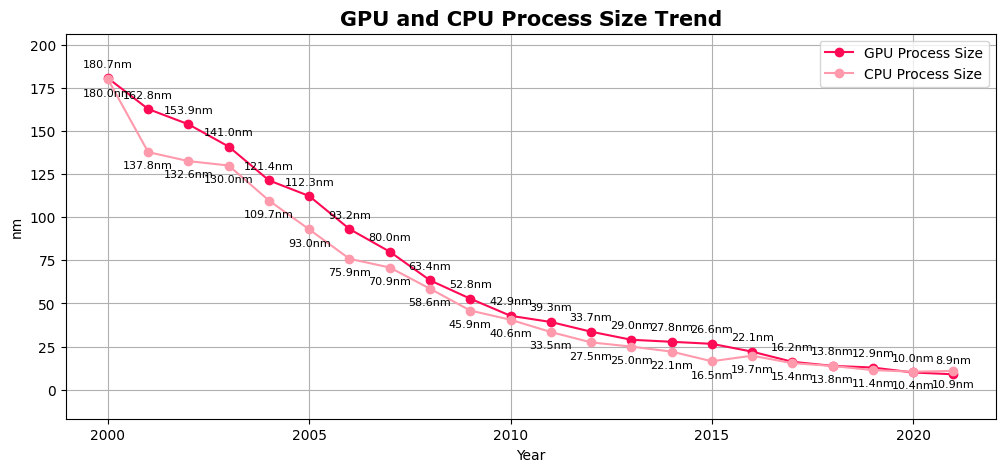

In [77]:
df_cpu_ps = df[['Type', 'Date', 'Process_Size']].where(df['Type'] == 'CPU').dropna()
df_cpu_ps['Date'] = pd.to_datetime(df_cpu_ps['Date'])
df_cpu_ps['Year'] = df_cpu_ps['Date'].dt.year
df_cpu_ps = df_cpu_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_cpu_ps.rename(columns={'Process_Size': 'CPU_Process_Size'}, inplace=True)

df_gpu_ps = df[['Type', 'Date', 'Process_Size']].where(df['Type'] == 'GPU').dropna()
df_gpu_ps['Date'] = pd.to_datetime(df_gpu_ps['Date'])
df_gpu_ps['Year'] = df_gpu_ps['Date'].dt.year
df_gpu_ps = df_gpu_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_gpu_ps.rename(columns={'Process_Size': 'GPU_Process_Size'}, inplace=True)

colors = ['#FF0A54', '#FF477E', '#FF5C8A', '#FF7096',
          '#FF85A1', '#FF99AC', '#FBB1BD', '#F9BEC7',
          '#F7CAD0', '#FAE0E5']

plt.figure(figsize=(12, 5))

plt.plot(df_gpu_ps['Year'], df_gpu_ps['GPU_Process_Size'],
         color=colors[0], label='GPU Process Size', marker='o')
plt.plot(df_cpu_ps['Year'], df_cpu_ps['CPU_Process_Size'],
         color=colors[5], label='CPU Process Size', marker='o')

for x, y in zip(df_gpu_ps['Year'], df_gpu_ps['GPU_Process_Size']):
    plt.annotate(f'{y:.1f}nm', 
                (x, y),
                textcoords="offset points",
                xytext=(0,8),
                ha='center',
                fontsize=8)  

for x, y in zip(df_cpu_ps['Year'], df_cpu_ps['CPU_Process_Size']):
    plt.annotate(f'{y:.1f}nm',
                (x, y),
                textcoords="offset points",
                xytext=(0,-12),
                ha='center',
                fontsize=8)  

plt.title('GPU and CPU Process Size Trend',
          fontfamily='Verdana',
          fontsize=15,
          fontweight='bold')

plt.ylabel('nm')
plt.xlabel('Year')
plt.legend()
plt.grid(axis='both', linestyle='-', alpha=1)

plt.margins(y=0.15)  

plt.show()

The graph compares CPU and GPU process size trends from 2000 to 2020, revealing a remarkably synchronized evolution in semiconductor manufacturing technology. Both processors started at similar process sizes around 180nm in 2000 and followed nearly identical downward trajectories over the two decades. The curves show three distinct phases: a steep decline from 2000-2005 (180nm to around 90nm), a moderate decrease from 2005-2010 (90nm to about 40nm), and a more gradual reduction from 2010-2020 (reaching approximately 7-8nm). The near-perfect alignment between CPU and GPU process sizes suggests that both industries have been equally successful in adopting new manufacturing technologies, facing similar technical challenges and limitations. This parallel development implies that semiconductor manufacturing advances have been industry-wide rather than CPU or GPU-specific, with both types of processors benefiting equally from improvements in fabrication technology. The slowing rate of decrease in recent years hints at the approaching physical limits of silicon-based manufacturing, suggesting future improvements may require revolutionary new technologies or materials. 

### Summary of CPU and GPU Die Size Trend

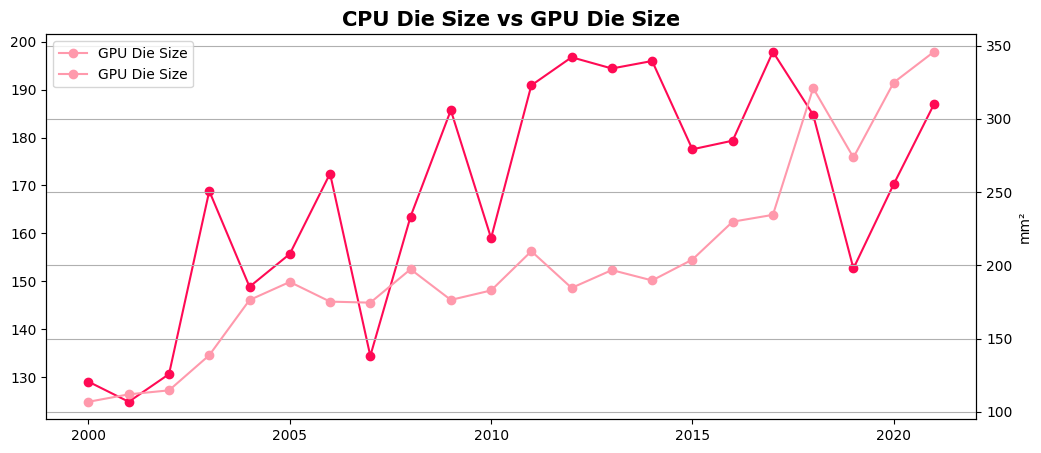

In [78]:
plt.figure(figsize=(12, 5))
plt.plot(dfpscpu['Year'], dfpscpu['Die_Size'], 
         color='#FF0A54', 
         label='CPU Die Size', 
         marker='o')

ax2 = plt.twinx()
ax2.plot(dfpsgpu['Year'], dfpsgpu['Die_Size'], 
         color='#FF99AC', 
         label='GPU Die Size', 
         marker='o')


plt.ylabel('Die Size (mm²)')
plt.tick_params(axis='y')


ax2.set_ylabel('mm²')
ax2.tick_params(axis='y')


plt.title('CPU Die Size vs GPU Die Size', 
         fontfamily='Verdana',
         fontsize=15,
         fontweight='bold')


plt.grid(axis='y', linestyle='-', alpha=1)


lines1, labels1 = plt.gca().get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()

When comparing both CPU and GPU die sizes on the same graph, we can observe distinct evolutionary patterns. While CPU die sizes (shown in darker pink) exhibit significant volatility, GPU die sizes (shown in lighter pink) demonstrate a more gradual and consistent upward trend. The CPU's fluctuations might reflect various architectural changes and manufacturing process transitions, while GPUs show a steadier growth pattern. Notably, there are points where the trends diverge significantly, particularly around 2018 where CPU die sizes dropped sharply while GPU sizes continued to increase. This suggests different optimization strategies and technical constraints between the two types of processors, with GPUs possibly prioritizing raw performance scaling while CPUs balance multiple factors including power efficiency and cost.

### Summary of CPU and GPU Transistor Trend

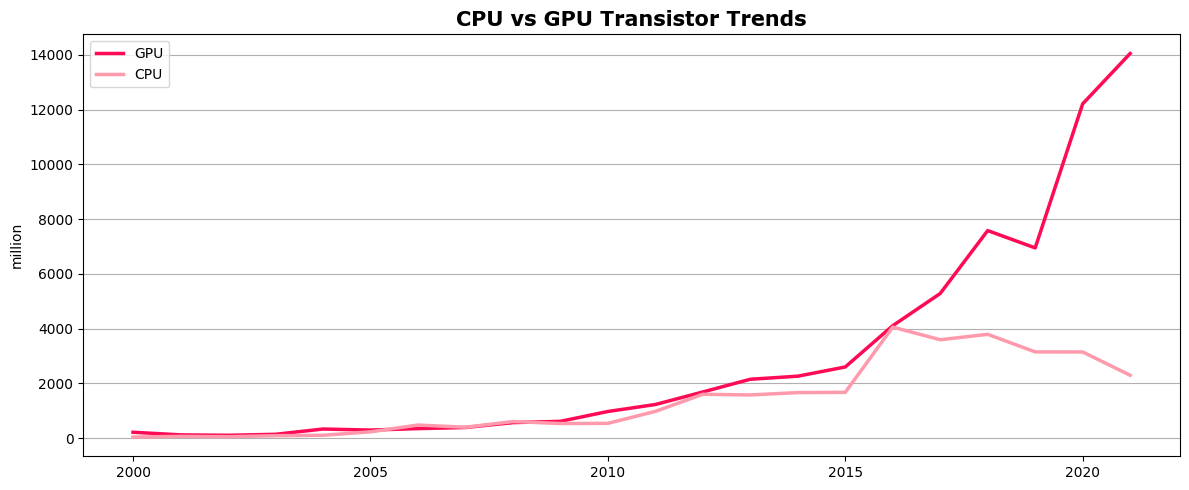

In [79]:
plt.figure(figsize=(12, 5))

plt.plot(dftgpu['Year'], dftgpu['Transistors'], color='#FF0A54', linewidth=2.5, label='GPU')
plt.plot(dftcpu['Year'], dftcpu['Transistors'], color='#FF99AC', linewidth=2.5, label='CPU')

plt.title('CPU vs GPU Transistor Trends', 
          fontfamily='Verdana',
          fontsize=15,
          fontweight='bold')
plt.ylabel('million')
plt.grid(axis='y', linestyle='-', alpha=1)

plt.legend(fontsize=10)

plt.tight_layout()

When viewed together, the divergence between CPU and GPU transistor scaling becomes stark. While both started with similar transistor counts around 2000, GPUs have significantly outpaced CPUs since 2015. The graph clearly shows how GPUs have become the dominant force in transistor scaling, with counts now nearly 6 times higher than CPUs by 2020. This divergence reflects a fundamental shift in computing architecture preferences, where parallel processing capabilities (GPU strength) have become increasingly important compared to sequential processing (CPU strength). The trends suggest that future high-performance computing might continue to shift toward GPU-like architectures, with CPUs potentially focusing more on specialized tasks and system management rather than raw computational power.

### Summary of CPU and GPU Frequency Trend

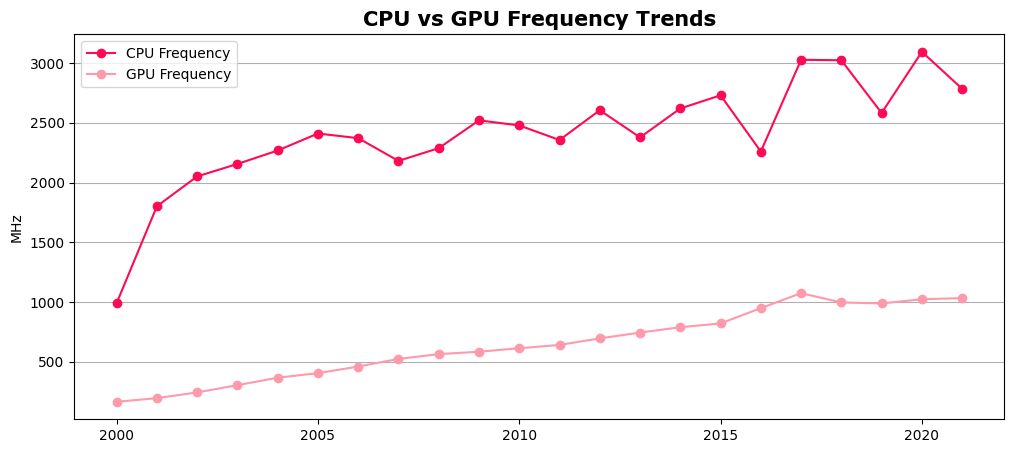

In [80]:
plt.figure(figsize=(12, 5))
plt.plot(dffcpu['Year'], dffcpu['Frequency'], 
         color='#FF0A54', 
         label='CPU Frequency',
         marker='o')

plt.plot(dffgpu['Year'], dffgpu['Frequency'], 
         color='#FF99AC', 
         label='GPU Frequency',
         marker='o')

plt.title('CPU vs GPU Frequency Trends',
         fontfamily='Verdana',
         fontsize=15,
         fontweight='bold')
plt.ylabel('MHz')

plt.grid(axis='y', linestyle='-', alpha=1)
plt.legend()

plt.show()

The combined CPU and GPU frequency trends from 2000 to 2020 reveal distinctly different evolutionary paths for these two technologies. The CPU frequency demonstrates a dramatic early acceleration from 1000 MHz to approximately 1800 MHz between 2000-2002, followed by a more modest growth pattern and eventual plateauing between 2200-2700 MHz from 2005-2015. Post-2015, CPU frequencies show increased volatility, reaching peaks of around 3000 MHz with notable fluctuations. In contrast, GPU frequencies (shown in lighter pink) exhibit a remarkably different pattern, starting much lower at around 200 MHz in 2000 but maintaining a steady, almost linear increase throughout the period. The GPU's gradual climb continues until reaching approximately 1000-1100 MHz by 2017, where it stabilizes. This stark contrast in development patterns reflects the fundamental differences in how these processors evolved: CPUs hit their frequency scaling limits earlier, leading to a focus on other performance improvements, while GPUs maintained a more consistent frequency growth before also reaching their own limitations in recent years. The graph effectively illustrates how both technologies, despite their different trajectories, are now facing similar challenges in pushing clock speeds higher, suggesting a industry-wide shift toward alternative methods of performance enhancement.

### Summary of Findings:


#### Key Findings
I. TDP Distribution Patterns:
1. Peak concentration at 50-100W range (1,917 units)
2. Median TDP of 67W with IQR from 35W to 95W
3. Maximum TDP reaches 900W for specialized cases
4. Majority of processors optimize for energy efficiency

II. Manufacturing Process Evolution:
1. Synchronized CPU/GPU development from 180nm (2000) to 7-8nm (2020)
2. Three distinct phases: rapid (2000-2005), moderate (2005-2010), gradual (2010-2020)
3. Approaching physical limits of silicon-based manufacturing
4. Industry-wide advancement rather than processor-specific progress

III. Die Size and Transistor Trends:
1. CPUs show volatile die size patterns
2. GPUs demonstrate steady upward trend in die size
3. Significant divergence in transistor counts post-2015
4. GPUs achieve 6x higher transistor density than CPUs by 2020

IV. Frequency Evolution:
1. CPUs: Rapid early growth (1000-1800 MHz), then plateau (2200-2700 MHz)
2. GPUs: Steady linear growth from 200 MHz to 1100 MHz
3. Both technologies showing recent frequency scaling limitations
4. Different evolutionary paths reflecting distinct architectural priorities

#### Conclusion
The 20-year evolution of processor technology reveals a complex interplay between performance advancement and power efficiency. The industry has successfully navigated multiple technological transitions, moving from simple frequency scaling to more sophisticated optimization strategies. The divergence between CPU and GPU development paths highlights the growing importance of specialized processing solutions, while the consistent focus on power efficiency demonstrates awareness of sustainability concerns. <br> <br>
As the industry approaches the physical limits of current silicon-based technology, future success will depend on breakthrough innovations in materials, manufacturing processes, and architectural designs. The clear trend toward parallel processing capabilities, exemplified by GPU development, suggests a fundamental shift in computing paradigms. However, the continued relevance of traditional CPU architectures for specific tasks indicates that future developments will likely focus on hybrid solutions that combine the strengths of both approaches. <br> <br>
The main challenge going forward will be maintaining the pace of performance improvements while addressing increasing power and thermal constraints. This will require a multi-faceted approach combining new materials science, innovative cooling solutions, and more efficient architectural designs. Success in these areas will be crucial for meeting the diverse needs of both mainstream users and high-performance computing applications, while ensuring sustainable and cost-effective solutions for the broader market.

#### Recommendations
I. Manufacturing Innovation:
1. Invest in post-silicon technologies
2. Explore new materials and fabrication techniques
3. Develop alternative manufacturing processes
4. Focus on breaking current physical limitations

II. Architecture Development:
1. Embrace hybrid CPU-GPU designs
2. Optimize for specific workload types
3. Balance sequential and parallel processing capabilities
4. Consider specialized processor designs for different markets

III. Power Management:
1. Continue focusing on energy-efficient mainstream designs
2. Develop advanced cooling solutions for high-TDP processors
3. Maintain dual-track development for both efficient and high-performance needs
4. Implement smarter power management technologies

IV. Market Strategy:
1. Maintain segmented product lines for different use cases
2. Focus on sustainable computing solutions
3. Address growing parallel processing demands
4. Develop specialized solutions for emerging applications (AI, gaming, data centers)

V. Future Development:
1. Prioritize alternative performance enhancement methods
2. Invest in architectural innovations
3. Focus on application-specific optimizations
4. Develop new cooling and power delivery technologies